#### Netflix EDA


#### Dataset available at : https://www.kaggle.com/datasets/shivamb/netflix-shows

![Netflix](Readme/Netflix.jpg)

## Importing and reading the data

In [179]:
# Importing necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings 
import re
plt.style.use('ggplot')
warnings.filterwarnings('ignore')
%matplotlib inline

In [180]:
df = pd.read_csv('netflix_titles.csv')
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


##  Understanding the data

In [181]:
df.shape

(8807, 12)

In [182]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [184]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## Data Preparation

#### * Changing Data types
#### * Fixing missing values
#### * Creating 2 new dataset : movies and tv shows for further analysis


###  I can clearly see that I need to change the datatype for  date_added and the duration columns  

In [185]:
df['date_added'] = pd.to_datetime(df['date_added'])


In [186]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

#### I'll be leaving the duration as it is for now, it requires some additional touch to it.

#### First let me dive into the data further

#### Inspecting Missing Values

In [187]:
df.isna().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [188]:
round(df.isna().sum()/df.shape[0]*100,2).sort_values(ascending=False)

director        29.91
country          9.44
cast             9.37
date_added       0.11
rating           0.05
duration         0.03
show_id          0.00
type             0.00
title            0.00
release_year     0.00
listed_in        0.00
description      0.00
dtype: float64

#### * I can clearly see some missing values that I can fix
#### * the rating, duration and date_added column represent a very less percentage of the dataset. I'll be droping drop them

In [189]:
df = df.dropna(subset= ['rating','duration','date_added'],axis = 0)

In [190]:
df.shape

(8790, 12)

#### * As for country and cast column, both represent more than 9% each of missing data 
#### * Hence I won't be dropping them, instead I'll label them as' unkown' and 'no cast' respectively

#### Before I do that let me dive into the data a bit by visualizing

## Movies Vs Tv Shows

In [191]:
df.type.value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

In [192]:
df.type.value_counts(normalize = True)*100

Movie      69.692833
TV Show    30.307167
Name: type, dtype: float64

In [193]:
 df.type.value_counts(normalize =True).values

array([0.69692833, 0.30307167])

#### Visualizing for better understanding

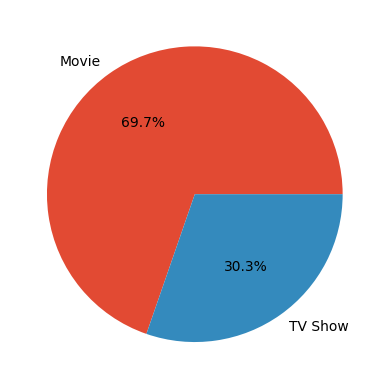

In [194]:
labels = df.type.value_counts().index
values = df.type.value_counts(normalize =True).values

ax = plt.pie(values, labels= labels,  autopct='%1.1f%%')

#### Wow 69.7% are movies and 30.3% are Tv SHow

#### Let me check the ratings

In [195]:
df.rating.value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

Text(0, 0.5, 'ratings')

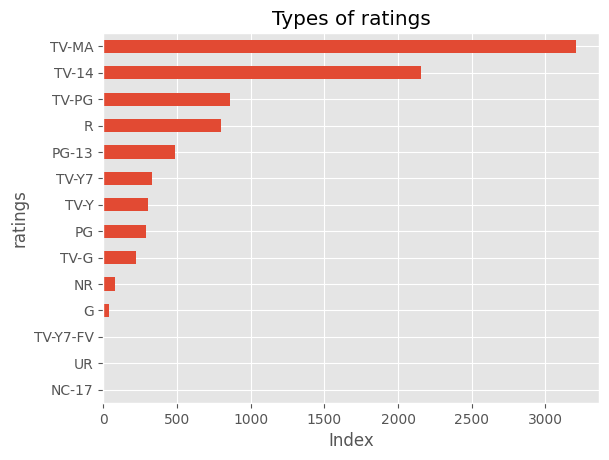

In [196]:
ax = df.rating.value_counts().sort_values() \
    .plot(kind= 'barh', title= 'Types of ratings')
ax.set_xlabel('Index')
ax.set_ylabel('ratings')

#### 1. The highest count TV-MA ( 3207): signifies content for mature audiences. Programs with this rating are generally not suitable for people or individuals under 17.

#### 2. Second highest is TV-14 (2160): signifies content with parents strongly cautioned. Content may be unsuitable for minors younger than 14 years of age 

#### 3. Third largest is the popular R rating (799).Children Under 17 Require Accompanying Parent or Adult Guardian

In [197]:
df.country.value_counts().head(10)

United States     2809
India              972
United Kingdom     418
Japan              243
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

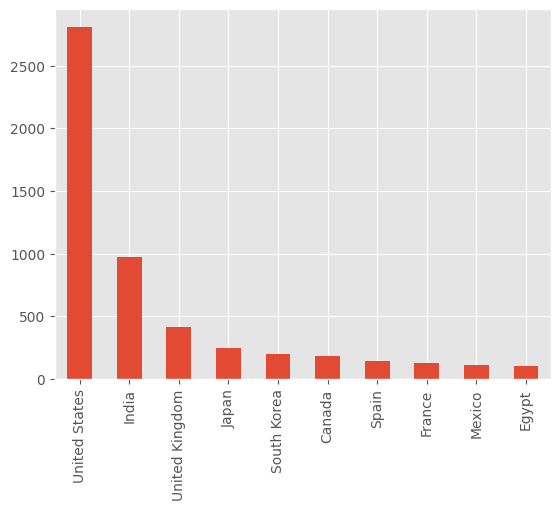

In [198]:
ax = df['country'][df.country != "unknown"].value_counts().head(10) \
    .plot(kind = 'bar')


#### As expected the US makes the most film, followed by India

In [199]:
df.release_year.value_counts().head(10)

2018    1146
2017    1030
2019    1030
2020     953
2016     901
2021     592
2015     555
2014     352
2013     286
2012     236
Name: release_year, dtype: int64

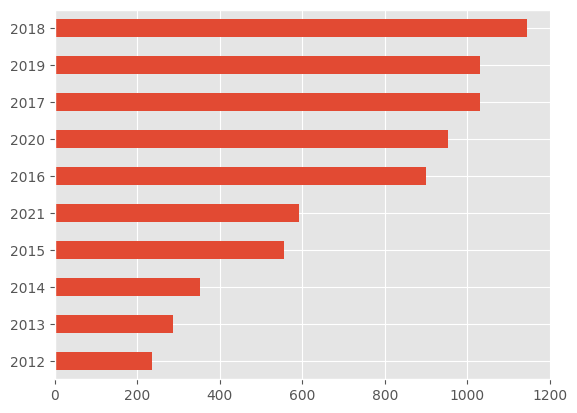

In [200]:
ax = df.release_year.value_counts().head(10).sort_values() \
    .plot(kind = 'barh')

#### Highest releases seen in 2018 - 1147 releases
#### followed by 2017 with 1032 releases

In [201]:
# top directors
df.director.value_counts().head(10)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Jay Chapman               12
Youssef Chahine           12
Steven Spielberg          11
Name: director, dtype: int64

#### Checking the most popular types of movies and tv shows releases

In [202]:
df.listed_in.value_counts().head(10)

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: listed_in, dtype: int64

<AxesSubplot: >

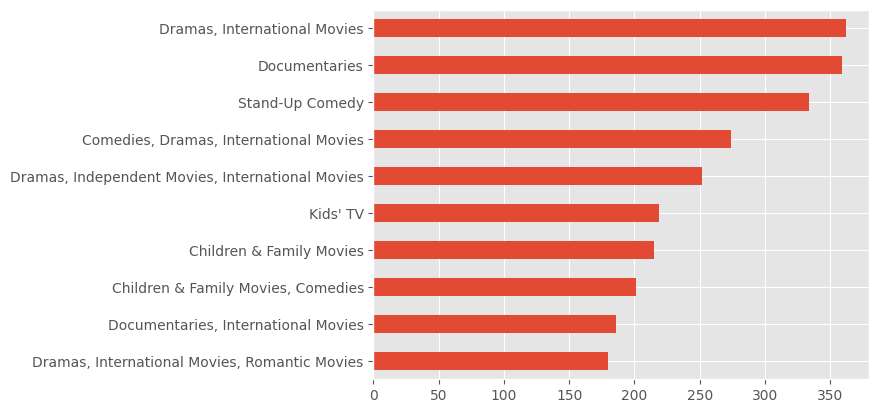

In [203]:
df.listed_in.value_counts().head(10).sort_values() \
.plot(kind= 'barh')

#### *I can clearly understand Dramas and documentaries, but man I did not expect Stand Up Comedy to be third on the list*

#### *Very Interesting!*

#### Now that I have a rough idea of my data,let me handle the  missing values



In [204]:
round(df.isna().sum()/ df.shape[0]*100,2).sort_values(ascending = False)

director        29.82
country          9.43
cast             9.39
show_id          0.00
type             0.00
title            0.00
date_added       0.00
release_year     0.00
rating           0.00
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

#### *Since country has a lot of missing values, I will not be dropping them*

In [205]:
df['country'] = df['country'].replace(np.NaN,"Unknown")

In [206]:
round(df.isna().sum()/ df.shape[0]*100,2).sort_values(ascending = False)

director        29.82
cast             9.39
show_id          0.00
type             0.00
title            0.00
country          0.00
date_added       0.00
release_year     0.00
rating           0.00
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

#### I'm going to be doing the same for the director and cast

In [207]:
# Replacing missing values in cast with no cast
df['cast']= df['cast'].replace(np.nan, "No Cast")

In [208]:
# Replacing missing values in director with no director
df['director']= df['director'].replace(np.nan, "No Director")

In [209]:
round(df.isna().sum()/ df.shape[0]*100,2).sort_values(ascending = False)

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

#### Now, Let's check which actors the most movie

In [210]:
cast_shows = df[df.cast != "No Cast"].set_index('title') \
            .cast.str.split(', ', expand= True).stack() \
            .reset_index(level=1, drop = True)
cast_shows


title
Blood & Water               Ama Qamata
Blood & Water              Khosi Ngema
Blood & Water            Gail Mabalane
Blood & Water           Thabang Molaba
Blood & Water         Dillon Windvogel
                         ...          
Zubaan                Manish Chaudhary
Zubaan                    Meghna Malik
Zubaan                   Malkeet Rauni
Zubaan                  Anita Shabdish
Zubaan           Chittaranjan Tripathy
Length: 64016, dtype: object

In [211]:
cast_shows.value_counts().head(10)

Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
dtype: int64

Text(0.5, 0, 'No. of Movies')

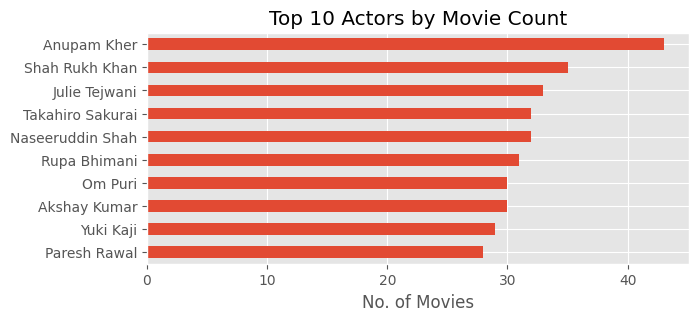

In [212]:
plt.figure(figsize=(7,3))
ax = cast_shows.value_counts().head(10).sort_values(ascending=True) \
    .plot(kind = 'barh', title = 'Top 10 Actors by Movie Count')
ax.set_xlabel('No. of Movies')

#### *Hmmm! Not surprising at all, Indian actors make a lot of movies, A lot!*

### Now let's do seperate analysis for movie and tv shows

#### Creating 2 dataset for further Analysis.

#### One for Movie 

#### and one for Tv Shows

In [213]:
movies_df = df[df['type'] =='Movie']
show_df = df[df['type'] == "TV Show"]

In [214]:
movies_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


#### I can see that there's some data cleaning needed with duration for both the dataset

#### I want the duration in numbers

In [215]:
movies_df['duration']= movies_df['duration'].str.replace('min',' ') 

In [216]:
movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...


In [217]:
movies_df['duration'] = pd.to_numeric(movies_df['duration'])

In [218]:
movies_df.describe()

,release_year,duration
count,6126.000000,6126.000000
mean,2013.120144,99.584884
std,9.681723,28.283225
min,1942.000000,3.000000
25%,2012.000000,87.000000
50%,2016.000000,98.000000
75%,2018.000000,114.000000
max,2021.000000,312.000000


#### Shortest movie is called Silent with only 3 min duration. Interesting!

In [219]:
movies_df.loc[movies_df['duration']==np.min(movies_df.duration)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3777,s3778,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",No Cast,United States,2019-06-04,2014,TV-Y,3,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ..."


#### Longest movie is called Black Mirror: Bandersnatch with a duration of 312 min. Yikes, I'm going to bed

In [220]:
movies_df.loc[movies_df['duration'] == np.max(movies_df.duration)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4253,s4254,Movie,Black Mirror: Bandersnatch,No Director,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question..."


#### Now let's look at the TV shows

#### I can see that it requires some data cleaning before I start the analysis



In [221]:
# I want duration of seasons in number only so I can use it for analysis
show_df['duration']= show_df['duration'].str.split(' ').str[0]

In [222]:
show_df['duration'] = pd.to_numeric(show_df.duration)

In [223]:
show_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Unknown,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [224]:
show_df.describe()

,release_year,duration
count,2664.000000,2664.000000
mean,2016.627628,1.751877
std,5.735194,1.550622
min,1925.000000,1.000000
25%,2016.000000,1.000000
50%,2018.000000,1.000000
75%,2020.000000,2.000000
max,2021.000000,17.000000


In [225]:
show_df.duration.value_counts()

1     1791
2      421
3      198
4       94
5       64
6       33
7       23
8       17
9        9
10       6
13       2
15       2
12       2
17       1
11       1
Name: duration, dtype: int64

In [226]:
show_df.query('duration >13')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
548,s549,TV Show,Grey's Anatomy,No Director,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2021-07-03,2020,TV-14,17,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...
2423,s2424,TV Show,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...","United States, Canada",2020-06-05,2019,TV-14,15,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ..."
4798,s4799,TV Show,NCIS,No Director,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,2018-07-01,2017,TV-14,15,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS – the Nav...


#### Wow Grey's Anatomy has the longest duration : 17 seasons!

#### Followed Supernatural and NCIS with 15 seasons each.
#### I grew up watching  supernatural


#### Let's plot it on a chart and see how that look like

<AxesSubplot: ylabel='title'>

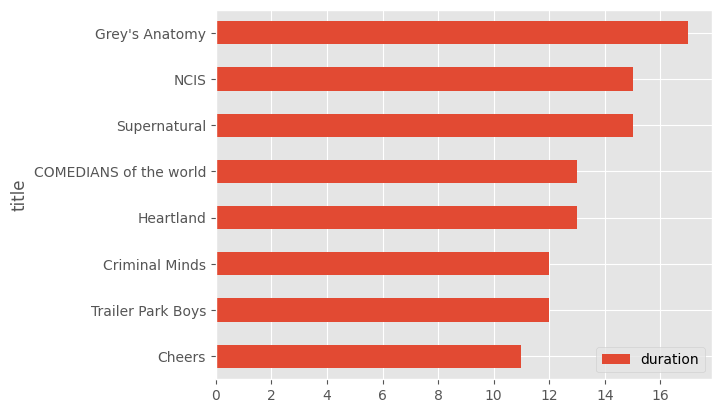

In [227]:
show_df[['title', 'duration']][show_df['duration']>10].sort_values(by = 'duration',ascending=True).plot(kind='barh',x='title', y = 'duration')

### Let's try creating some wordcloud to understand some of the trends

#### Wordcloud for countries

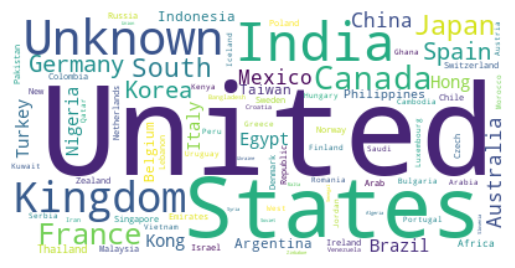

In [228]:
text = " ".join(country for country in df.country)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)


plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

plt.show()

### Wordcloud for genres

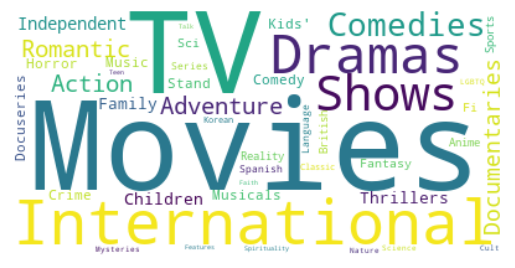

In [229]:
text2 = " ".join(listed_in for listed_in in df.listed_in)
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)


plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

plt.show()

#### Wordcloud for ratings

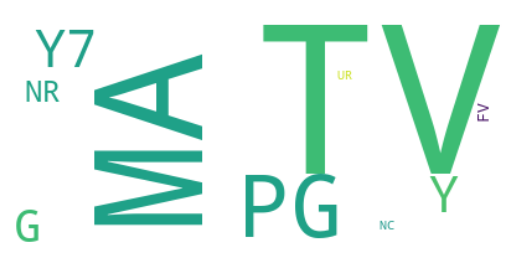

In [230]:
text3 = " ".join(rating for rating in df.rating)
word_cloud3 = WordCloud(collocations = False, background_color = 'white').generate(text3)


plt.imshow(word_cloud3, interpolation='bilinear')

plt.axis("off")

plt.show()